**Reducing the batch size** 

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

In [0]:
batch_size = 32
num_classes = 10
epochs = 60

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Dense(640, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(640, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 640)               1966720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 640)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 640)               410240    
_________________________________________________________________
dropout_2 (Dropout)          (None, 640)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6410      
Total params: 2,383,370
Trainable params: 2,383,370
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 49s 982us/step - loss: 0.0834 - acc: 0.2674 - val_loss: 0.0780 - val_acc: 0.3632
Epoch 2/60
50000/50000 [==============================] - 49s 981us/step - loss: 0.0782 - acc: 0.3500 - val_loss: 0.0757 - val_acc: 0.3848
Epoch 3/60
50000/50000 [==============================] - 50s 1ms/step - loss: 0.0758 - acc: 0.3787 - val_loss: 0.0737 - val_acc: 0.4008
Epoch 4/60
50000/50000 [==============================] - 59s 1ms/step - loss: 0.0742 - acc: 0.3984 - val_loss: 0.0722 - val_acc: 0.4195
Epoch 5/60
50000/50000 [==============================] - 63s 1ms/step - loss: 0.0729 - acc: 0.4107 - val_loss: 0.0709 - val_acc: 0.4350
Epoch 6/60
50000/50000 [==============================] - 61s 1ms/step - loss: 0.0717 - acc: 0.4274 - val_loss: 0.0703 - val_acc: 0.4431
Epoch 7/60
50000/50000 [==============================] - 60s 1ms/step - loss: 0.0707 - acc: 0.4347 - val_loss: 0.0695 - val

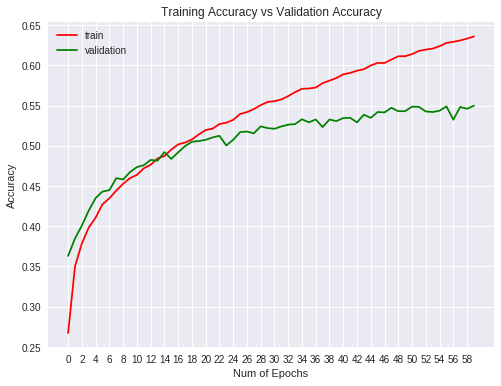

In [0]:
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 60, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

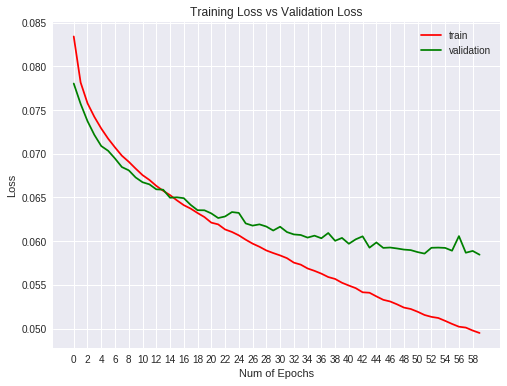

In [0]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 60, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

**Conclusion:**
Reduced batch size was initially giving good results. The execution time although was affected. But after 40 epochs the model started over fitting.